# Basic usage

Using `pyrosm` is straightforward. Following sections introduce the basics how to parse various kind of datasets from OSM Protobuf files.

How to?:

 - [Read street networks from OSM](#Read-street-networks)
 - [Read buildings from OSM](#Read-buildings)
 - [Read Points of Interest (POI)](#Read-Points-of-Interest)
 - [Read landuse from OSM](#Read-landuse)
 - [Read natural (elements) from OSM](#Read-natural)
 - [Read boundaries from OSM](#Read-boundaries)
 - [Read OSM data with custom filter](#Read-OSM-data-with-custom-filter)
 - [Use bounding box to filter data from specific area](#Filtering-data-based-on-bounding-box)
 - [Use the Pyrosm/OSM tagging system](#Pyrosm/OSM-tagging-system)
   - [How to control which OSM attributes are returned as columns?](#Controlling-which-OSM-attributes-are-parsed-into-columns)

## Protobuf file: What is it, where to get one?

`Pyrosm` is designed to work with [Protocolbuffer Binary Format (PBF)](https://wiki.openstreetmap.org/wiki/PBF_Format) -files. This file format is a commonly used and efficient method to serialize and compress structured data which is also used by OpenStreetMap contributors to distribute the OSM data. Retrieving OSM data in such format can be done for example by using the data dumps provided by [Geofabrik](http://download.geofabrik.de/). 


## Initializing the Pyrosm OSM -reader object

When using `Pyrosm`, the first step is to initialize a specific reader object called `OSM` that is available from the `pyrosm` library: 

In [1]:
# Import the library
import pyrosm

# Print information about the basic usage of the `OSM` reader object
help(pyrosm.OSM.__init__)

Help on function __init__ in module pyrosm.pyrosm:

__init__(self, filepath, bounding_box=None)
    Parameters
    ----------
    
    filepath : str
        Filepath to input OSM dataset ( *.osm.pbf )
    
    bounding_box : list | shapely geometry
        Filtering OSM data spatially is allowed by passing a
        bounding box either as a list `[minx, miny, maxx, maxy]` or
        as a Shapely Polygon/MultiPolygon or closed LineString/LinearRing.



As we can see from the documentation, the `OSM` object accepts two parameters:
  1. `filepath` which is the filepath to the PBF file (*.osm.pbf) which will be read (see info above how to get one), and
  2. `bounding_box` which is an optional parameter that can be used to filter OSM data geographically from specific area (see [here](#Filtering-data-based-on-bounding-box) for further details) 
  
The following shows how to initialize an `OSM` reader object using a test dataset that comes with Pyrosm, and which can be retrieved using a `get_path` function:

In [2]:
import pyrosm

# Get filepath to test PBF dataset
fp = pyrosm.get_path("test_pbf")
print("Filepath to test data:", fp)

# Initialize the OSM object 
osm = pyrosm.OSM(fp)

# See the type
print("Type of 'osm' instance: ", type(osm))

Filepath to test data: C:\HYapp\Anaconda3\lib\site-packages\pyrosm\data\test.osm.pbf
Type of 'osm' instance:  <class 'pyrosm.pyrosm.OSM'>


Okay, as we can see the test dataset lives in my case somewhere under the Anaconda3 package, 
and the type of the `osm` instance is something called `pyrosm.pyrosm.OSM`. 

Notice that `osm` (lower case) is the actually initialized **reader instance** for the given PBF dataset that should always be used to make the calls for fetching different datasets from the OpenStreetMap PBF -file. Read further to see how things work.

### Available test datasets

The `Pyrosm` has a few test datasets that can be used very easily without the need to go and download PBF data from Geofabrik. 

You can see all available datasets by calling `pyrosm.data.available`:

In [3]:
import pyrosm
print(pyrosm.data.available)

['test_pbf', 'helsinki_pbf', 'helsinki_region_pbf', 'new_york_state_pbf', 'greater_london_pbf', 'southern_california_pbf']


Okay as we can see, there are a few datasets that can be easily imported with the `get_path()` -function. 
The data for larger areas (such as New York State or London) will be downloaded from Geofabrik website to the local TEMP directory.
After the first download, the data will always be read from the TEMP, unless specifically requested to update the data with `update=True` parameter:


In [4]:
help(pyrosm.get_path)

Help on function get_path in module pyrosm.data:

get_path(dataset, update=False)
    Get the path to the data file.
    
    Parameters
    ----------
    dataset : str
        The name of the dataset. See ``pyrosm.data.available`` for
        all options.
    
    update : bool
        Whether the PBF file should be downloaded/updated if the dataset
        with the same name exists in the temp.



## Read street networks

Pyrosm makes it easy to filter street networks using the `get_network()` method. 
You can parse streets separately for different travel modes by specifying the 
type of network using `network_type` -parameter.
The allowed network types are:

 - `walking` (default)
 - `cycling`
 - `driving`
 - `driving+service` (includes also [public service vehicles](https://wiki.openstreetmap.org/wiki/Key:psv))
 
The following shows how to read all drivable roads from OSM. Notice that from here on, we will import the `OSM` reader object directly from the package:

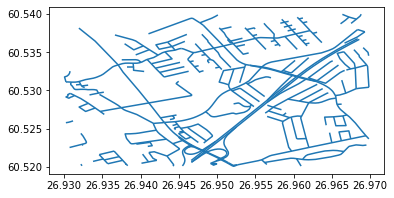

In [5]:
from pyrosm import OSM
from pyrosm import get_path

# Pyrosm comes with a couple of test datasets 
# that can be used straight away without
# downloading anything
fp = get_path("test_pbf")

# Initialize the OSM parser object
osm = OSM(fp)

# Read all drivable roads
# =======================
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

## Read buildings



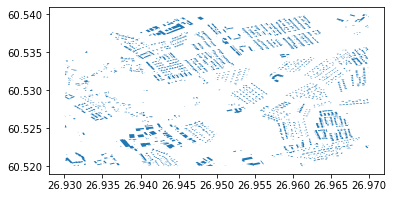

In [6]:
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("test_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
buildings = osm.get_buildings()
buildings.plot()

## Read Points of Interest

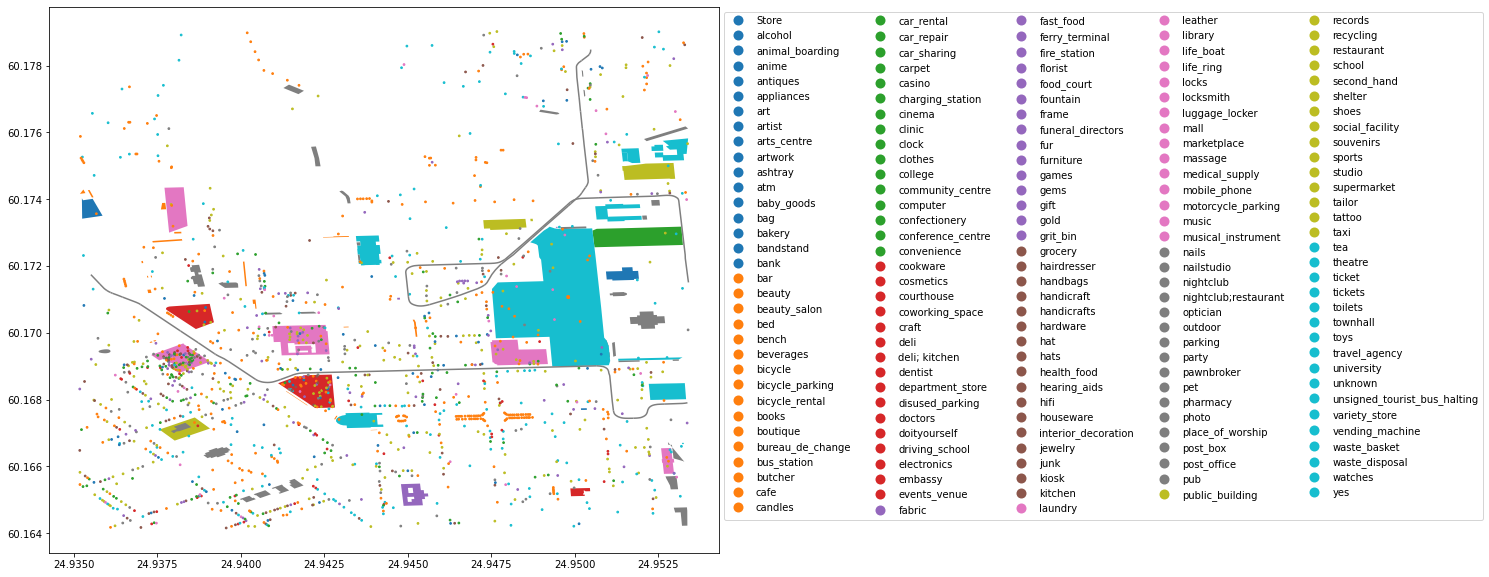

In [7]:
# Read POIs such as amenities and shops
# =====================================
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_pbf")
# Initialize the OSM parser object
osm = OSM(fp)

# By default pyrosm reads all elements having "amenity", "shop" or "tourism" tag
# Here, let's read only "amenity" and "shop" by applying a custom filter that
# overrides the default filtering mechanism
custom_filter = {'amenity': True, "shop": True}
pois = osm.get_pois(custom_filter=custom_filter)

# Gather info about POI type (combines the tag info from "amenity" and "shop")
pois["poi_type"] = pois["amenity"]
pois["poi_type"] = pois["poi_type"].fillna(pois["shop"])

# Plot
ax = pois.plot(column='poi_type', markersize=3, figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=5, bbox_to_anchor=(1, 1)))

## Read landuse

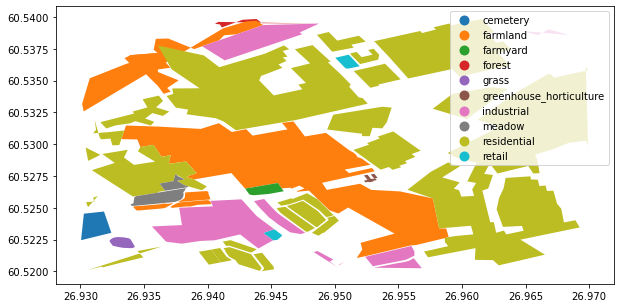

In [8]:
# Read landuse
# ============
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("test_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
landuse = osm.get_landuse()
landuse.plot(column='landuse', legend=True, figsize=(10,6))

## Read natural

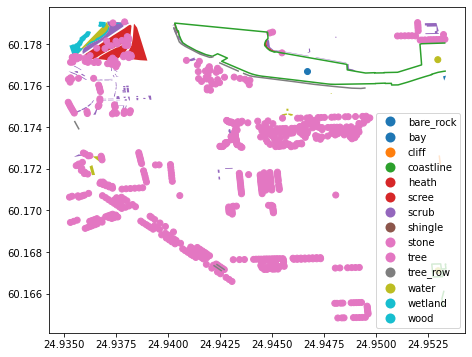

In [9]:
# Read natural
# ============
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_pbf")
# Initialize the OSM parser object
osm = OSM(fp)
natural = osm.get_natural()
natural.plot(column='natural', legend=True, figsize=(10,6))

## Read boundaries

`Pyrosm` supports reading boundaries such as administrative borders from PBF using `get_boundaries()` -function. 
By default, the function reads all `"administrative"` borders from the PBF. You can adjust the type of boundary that is parsed from PBF by modifying `boundary_type` -parameter. You can also search boundaries for specific name using `name` parameter:

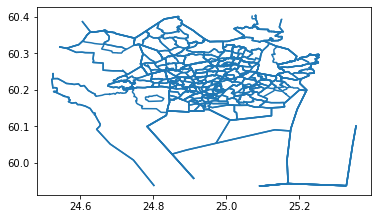

In [10]:
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_region_pbf")
osm = OSM(fp)

# Read all boundaries using the default settings
boundaries = osm.get_boundaries()
boundaries.plot()

The following shows how to search a specific boundary using the `name` -parameter.    

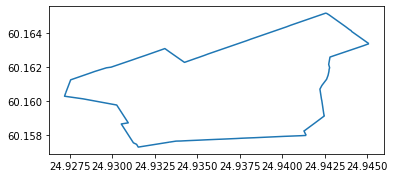

In [11]:
# Note: the following uses the same osm instance initialized above
selected_boundary = osm.get_boundaries(name="Punavuori")
selected_boundary.plot()

The name search functionality supports partial text search, meaning that e.g. a query `"vuori"` would return all elements where the work `"vuori"` is included in the name tag (such as "Punavuori"):

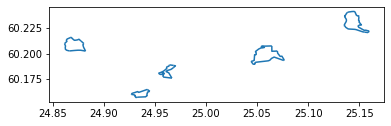

In [12]:
# Use a partial name "vuori" to look for data
selected_boundary = osm.get_boundaries(name="vuori")
selected_boundary.plot()

As we can see there were multiple boundaries in the data that included the word `"vuori"` in their name:

In [13]:
# Check all records that have the word "vuori" in their name
selected_boundary['name'].unique()

array(['Punavuori', 'Munkkivuori', 'Roihuvuori', 'Mustavuori',
       'Vilhonvuori'], dtype=object)

It is also possible to search different kind of boundaries from the PBF.

Supported boundary types are:

   - `"administrative` (default)
   - `"national_park"`
   - `"political"`
   - `"postal_code"`
   - `"protected_area"`
   - `"aboriginal_lands"`
   - `"maritime"`
   - `"lot"`
   - `"parcel"`
   - `"tract"`
   - `"marker"`
   - `"all"`
    
Let's read all `"protected_area"` boundaries from the PBF:

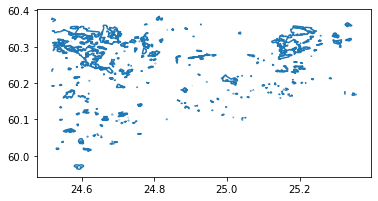

In [14]:
# Note: the following uses the same osm instance initialized above 
protected_areas = osm.get_boundaries(boundary_type="protected_area")
protected_areas.plot()

## Read OSM data with custom filter

Pyrosm also allows making custom queries. For example, to parse all transit related OSM elements you can use following approach 
and create a custom filter combining multiple criteria:

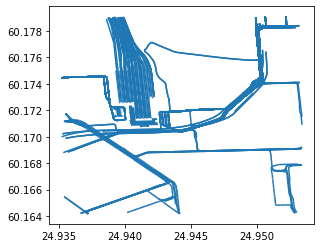

In [15]:
from pyrosm import OSM
from pyrosm import get_path
fp = get_path("helsinki_pbf")

# Initialize the OSM parser object with test data from Helsinki
osm = OSM(fp)

# Test reading all transit related data (bus, trains, trams, metro etc.)
# Exclude nodes (not keeping stops, etc.)
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'route': routes,
                                        'railway': rails,
                                        'bus': bus,
                                        'public_transport': True},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)
transit.plot()

Further information on how to make customized queries is available in [Parsing OSM data with custom queries](custom_filter.ipynb).

## Filtering data based on bounding box

Quite often one might be needing to extract only a subset of the whole OSM PBF file covering e.g. a specific region. `Pyrosm` provides an easy way to filter even larger PBF files using a bounding box (rectangular shape) or a more complex geometric feature (e.g. a Polygon). In the following, we will go through the process of extracting a small sample from the whole PBF dataset for specific area of interest. We will use a data dump from Greater London region and extract data covering the Borough of Camden.

In [16]:
from pyrosm import OSM, get_path

# Download a dataset for Greater London (update if exists in the temp already)
fp = get_path("greater_london_pbf", update=True)
osm = OSM(fp)

Downloaded Protobuf data 'greater-london-latest.osm.pbf' (55.2 MB) to TEMP:
'C:\Users\hentenka\AppData\Local\Temp\pyrosm\greater-london-latest.osm.pbf'


In [17]:
# Read buildings (takes ~30 seconds)
buildings = osm.get_buildings()
buildings.head(2)

,addr:city,addr:country,addr:full,addr:housenumber,addr:housename,addr:postcode,addr:place,addr:street,email,name,...,source,start_date,wikipedia,id,timestamp,version,tags,geometry,osm_type,changeset
0,None,None,None,None,None,None,None,None,None,Laurence House,...,None,None,None,2956186,1469657765,2,None,"POLYGON ((-0.02162 51.44472, -0.02033 51.44469...",way,NaN
1,None,None,None,None,Town Hall,SE6 4RU,None,Catford Broadway,None,Lewisham Town Hall,...,None,None,None,2956187,1504282380,5,None,"POLYGON ((-0.02110 51.44523, -0.02132 51.44508...",way,NaN


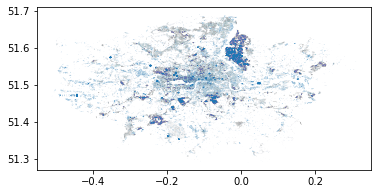

In [18]:
# Plot the buildings (will take awhile to plot)
buildings.plot()

Okay as we can see, we now have quite a few buildings from the Greater London area (~488,000). 

Next, let's filter the data spatially and include only buildings from the Borough of Camden. There are a couple of ways how you can pass the bounding box information to the Pyrosm:

 1. You can specify the bounding box by **a list of x- and y-coordinates** (in decimal degrees) of the lower left corner and upper right corner of the geographical area (rectangular) that you want to keep as a result: **[minx, miny, maxx, maxy]** 
 2. You can also specify the bounding by passing a **Shapely Polygon, MultiPolygon or LinearRing** (all closed geometries supported) that can be used to filter the data with a more complex geographical features.
 
Let's filter the data by using a the boundary of the Camden Borough as our spatial filter. For finding the boundaries of Camden Borough is easy by utilizing the `get_boundaries()` -function and using the `name` parameter:

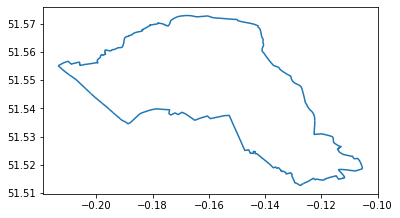

In [19]:
# Get the borough of Camden as our bounding box
bounding_box = osm.get_boundaries(name="London Borough of Camden")
bounding_box.plot()

Now we can initialize the `OSM` reader with the given bounding box that will then keep the data only from the areas that are **within** the given bounding box:

In [20]:
# Get the shapely geometry from GeoDataFrame
bbox_geom = bounding_box['geometry'].values[0]

# Initiliaze with bounding box
osm = OSM(fp, bounding_box=bbox_geom)

Now the bounding box information is stored in the attribute `bounding_box` that will be applied **every time** when an extract of the PBF (e.g. buildings, roads, etc.) is parsed:

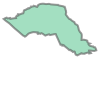

In [21]:
# Bounding box is now stored as an attribute 
osm.bounding_box

**Finally**, let's read the buildings now from the Camden Borough using our bounding box filter. Notice, that you do not need to make any changes to the actual `get_buildings()` call, as the bounding box information is read automatically from the osm instance (`osm.bounding_box`).

In [22]:
# Retrieve buildings for Camden
camden = osm.get_buildings()

Okay, now we have data for the Camden area! Let's take a look what it looks like on a map. 
Here, we will color the building based on how it has been tagged in the OSM:

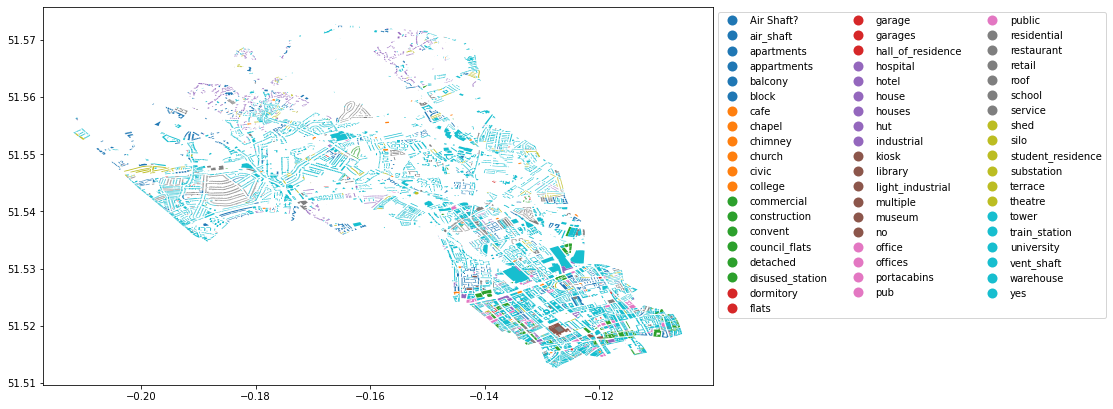

In [23]:
# Let's plot the buildings and specify colors according the type of the building
ax = camden.plot(column="building", figsize=(12,12), legend=True, legend_kwds=dict(loc='upper left', ncol=3, bbox_to_anchor=(1, 1)))

Great, now we can see that a subset of the data was taken according our bounding box coordinates.

We can now utilize the same bounding box for filtering other datasets as well, which can be handy. Let's also filter the walkable roads from the same area:

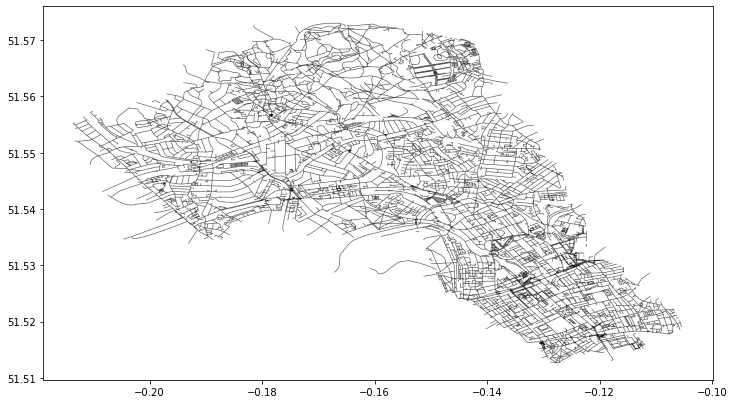

In [24]:
# Apply the same bounding box filter and retrieve walking network
walk = osm.get_network("walking")
walk.plot(color="k", figsize=(12,12), lw=0.7, alpha=0.6)

## Pyrosm/OSM tagging system



OpenStreetMap uses a "free tagging system" that allows the map to include an unlimited number of attributes describing each feature. A tag consists of two items, a key and a value. Tags describe specific features of map elements (nodes, ways, or relations) or changesets. Both items are free format text fields, but can often represent also numeric or other structured items (e.g. `maxspeed` attribute contains speed limit information at a given road represented in numbers) ([OSM Wiki, 2020](https://wiki.openstreetmap.org/wiki/Map_Features)).

Because of this flexibility, OSM data tend to contain huge number of different attributes. Because keeping all of these attributes in their own columns is not very practical (the dataframe can end up having even hundreds of columns), `Pyrosm` implements its own tagging system where only specific tags are kept as columns (separately for each OSM key). All the rest of the attributes are stored into a separete column `"tags"` which is a valid JSON object.  

It is possible to see these default tags from the `osm` instance directly by accessing its configuration settings. Let's see how:  

In [25]:
from pyrosm import OSM, get_path

# Initialize the OSM reader with test data
fp = get_path("test_pbf")
osm = OSM(fp)

# The instance has a configuration attribute containing:
print([item for item in osm.conf.__dict__.keys() if not item.startswith("_")])

['network_filters', 'tags']


Okay, from here we can see that the configuration includes `network_filter` attribute and `tags` attribute:

 - `network_filter` attribute contains information about the rules that are applied when parsing different kind of roads from the OSM
 - `tags` attribute contains information about the tags that are parsed into columns by default  

Let's take a closer look into the `tags`:

In [26]:
# Show all available tag attributes
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

Okay, so this is a list basically containing all OSM **primary features** that can be parsed from the OSM (see [wiki for details](https://wiki.openstreetmap.org/wiki/Map_Features#Primary_features)).
Each of these items contain a list of default tags (OSM keys) that will be inserted into columns when parsing the OSM data with Pyrosm. 

For example the default tags that will be turned into columns from **buildings** can be accessed by:

In [27]:
# Show all tags that are converted into columns from building features
osm.conf.tags.building

['addr:city',
 'addr:country',
 'addr:full',
 'addr:housenumber',
 'addr:housename',
 'addr:postcode',
 'addr:place',
 'addr:street',
 'email',
 'name',
 'opening_hours',
 'operator',
 'phone',
 'ref',
 'url',
 'website',
 'yes',
 'building',
 'amenity',
 'building:flats',
 'building:levels',
 'building:material',
 'building:max_level',
 'building:min_level',
 'building:fireproof',
 'building:use',
 'craft',
 'height',
 'internet_access',
 'landuse',
 'levels',
 'office',
 'operator',
 'shop',
 'source',
 'start_date',
 'wikipedia',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'changeset',
 'version',
 'geometry',
 'id',
 'nodes',
 'timestamp',
 'version',
 'id',
 'nodes',
 'timestamp',
 'changeset',
 'version',
 'geometry']

Okay, as we can see there are quite a few attributes that will be parsed into columns **if they exist in the data**. The list is mostly based on the OSM documentation about [Key:building](https://wiki.openstreetmap.org/wiki/Key:building) but it also contains some generic attributes that are commonly useful for many types of OSM features such as name, address information, opening_hours, website etc. Similar approach is used with all OSM Keys listed above in `conf.tags.available`. If the data contains additional attributes not listed in the default tags, such attributes are stored separately into a column `"tags"`. 

Let's make an example to understand this better:

In [28]:
# Parse buildings
buildings = osm.get_buildings()

# Print columns
buildings.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'geometry', 'tags', 'osm_type'],
      dtype='object')

Okay, as we can see, our test data contains quite many of the default tags as columns (not all though). We seem to have also some additional data in the "tags" columns which were not listed in the *default tag list*.

- Let's take a closer look at those:

In [29]:
# List "extra" tags that were associated with some of the buildings
buildings["tags"].unique()

array([None, '{"mml:class":"42211"}', '{"mml:class":"42221"}',
       '{"mml:class":"42261"}', '{"mml:class":"42241"}',
       '{"mml:class":"42212"}'], dtype=object)

Okay, as we can see, some of the OSM elements included information about `"mml:class"` which is additional data that might be relevant for some, but most probably not for most, hence it is not added as a column to the GeoDataFrame. 

It is still possible to access the data values of these "extra tags" by parsing the data from the JSON e.g. as follows:  

In [30]:
import json 

# Iterate over rows having extra tags and print out the values
rows_with_extra_info = buildings.dropna(subset=["tags"])


i = 0
for row in rows_with_extra_info.itertuples():
    
    # Read the JSON
    tags = json.loads(row.tags)
    
    # Print the keys and values
    for key, value in tags.items():
        print("Key:", key, ", value: ", value)
    
    # Continue only up to first 10 
    if i == 9:
        break
    i+=1

Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42221
Key: mml:class , value:  42211
Key: mml:class , value:  42211
Key: mml:class , value:  42211


### Controlling which OSM attributes are parsed into columns 

In some cases, it might be useful to parse some of these "extra" attributes directly into columns. Doing this is easy with `pyrosm` which is demonstrated below.  

In [31]:
from pyrosm import OSM, get_path
# Get test data 
fp = get_path("test_pbf")

# Initialize the reader
osm = OSM(fp)
            
buildings = osm.get_buildings()

# Print info
print("Existing columns:\n", buildings.columns)
print("\nAdditional attributes in the 'tags': \n", buildings.tags.unique())

Existing columns:
 Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'geometry', 'tags', 'osm_type'],
      dtype='object')

Additional attributes in the 'tags': 
 [None '{"mml:class":"42211"}' '{"mml:class":"42221"}'
 '{"mml:class":"42261"}' '{"mml:class":"42241"}' '{"mml:class":"42212"}']


Okay, as we can see the `"tags"` column includes additional information with key `"mml:class"`. If we would like to parse this attribute also as a column in our resulting GeoDataFrame, we can easily do this by using `extra_attributes` -parameter which accepts a list of keys (one or multiple) that will be converted into columns: 

In [32]:
# Parse buildings and store also "mml:class" as a column
buildings2 = osm.get_buildings(extra_attributes=["mml:class"])

# Print columns
buildings2.columns

Index(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'name', 'opening_hours', 'phone', 'building',
       'building:levels', 'landuse', 'shop', 'source', 'id', 'timestamp',
       'version', 'geometry', 'mml:class', 'osm_type'],
      dtype='object')

Great! Now the `"mml:class"` was also added as column in our GeoDataFrame:

In [33]:
buildings2.tail(5)

,addr:city,addr:country,addr:housenumber,addr:postcode,addr:street,name,opening_hours,phone,building,building:levels,landuse,shop,source,id,timestamp,version,geometry,mml:class,osm_type
2188,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115702,1465573852,1,"POLYGON ((26.96337 60.52196, 26.96330 60.52205...",42211,way
2189,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115707,1465573852,1,"POLYGON ((26.96773 60.53151, 26.96771 60.53167...",42211,way
2190,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115720,1465573853,1,"POLYGON ((26.95398 60.52896, 26.95416 60.52883...",42211,way
2191,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115722,1465573853,1,"POLYGON ((26.96623 60.53462, 26.96615 60.53469...",42211,way
2192,None,None,None,None,None,None,None,None,residential,None,None,None,None,424115743,1465573855,1,"POLYGON ((26.93940 60.52654, 26.93940 60.52662...",42211,way


Now it is easy to access and use the values of the new column in a similar manner as any other column:

In [34]:
# Get unique values in the "mml:class" column
print(buildings2["mml:class"].unique())

[None '42211' '42221' '42261' '42241' '42212']
